In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("csv/PROGNOSA 2021-2024.csv")

In [ ]:
bulan_mapping = {
    "januari": "01",
    "februari": "02",
    "maret": "03",
    "april": "04",
    "mei": "05",
    "juni": "06",
    "juli": "07",
    "agustus": "08",
    "september": "09",
    "oktober": "10",
    "november": "11",
    "desember": "12"
}


In [ ]:
tanaman_input = input("Masukkan nama tanaman yang akan dipilih: ")
bulan_forecast_input = int(input("Masukkan berapa bulan kedepan yang ingin di forecast: "))

In [ ]:
data_filtered = data[data["tanaman"].str.lower() == tanaman_input.lower()].copy()
data_filtered["bulan_num"] = data_filtered["bulan"].str.lower().map(bulan_mapping)
data_filtered["tanggal"] = pd.to_datetime(data_filtered["tahun"].astype(str) + "-" + data_filtered["bulan_num"] + "-01")
data_filtered = data_filtered.sort_values("tanggal")


09:00:25 - cmdstanpy - INFO - Chain [1] start processing
09:00:26 - cmdstanpy - INFO - Chain [1] done processing


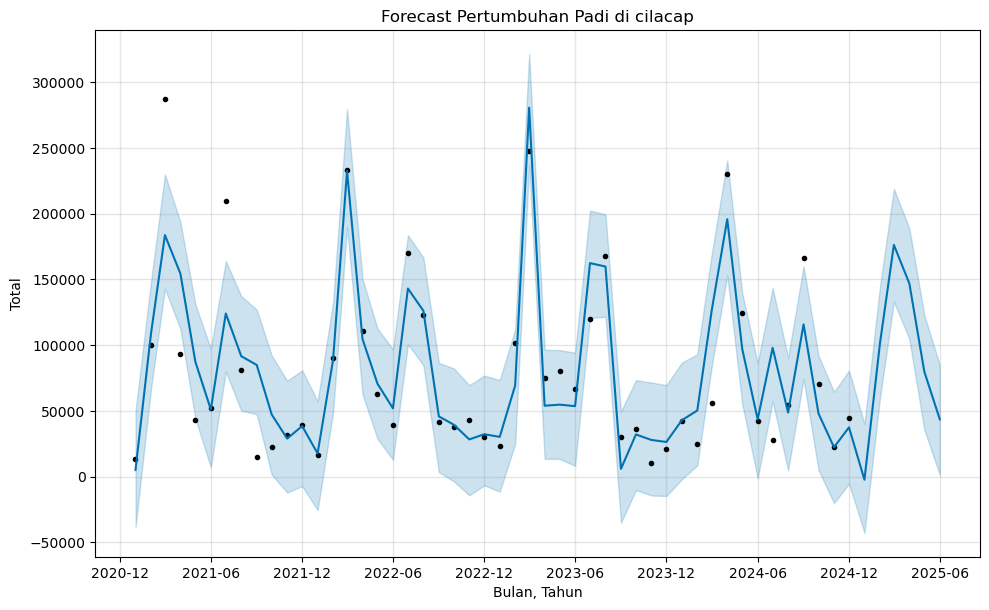

09:00:28 - cmdstanpy - INFO - Chain [1] start processing
09:00:28 - cmdstanpy - INFO - Chain [1] done processing


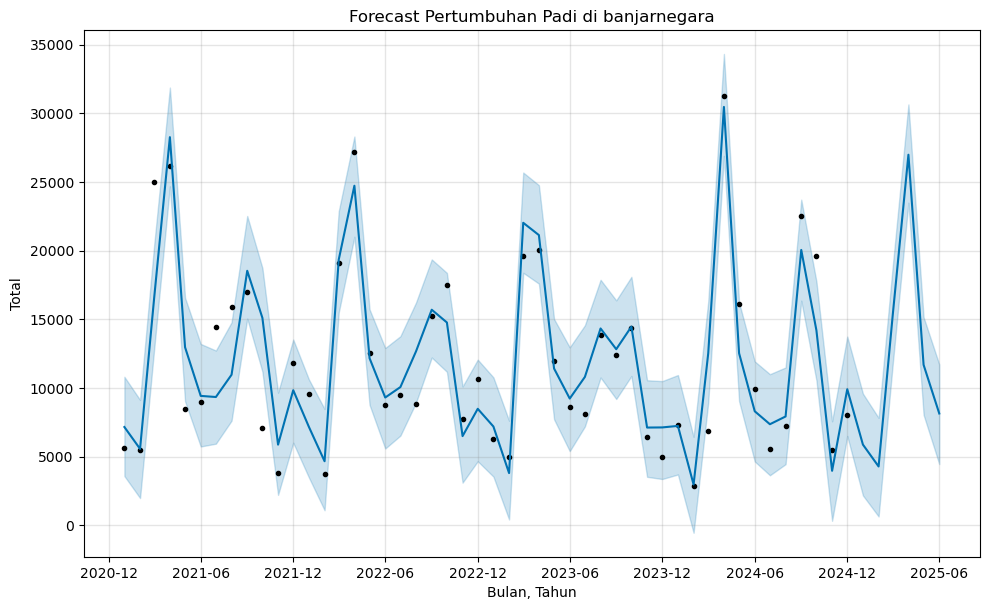

09:00:30 - cmdstanpy - INFO - Chain [1] start processing
09:00:30 - cmdstanpy - INFO - Chain [1] done processing


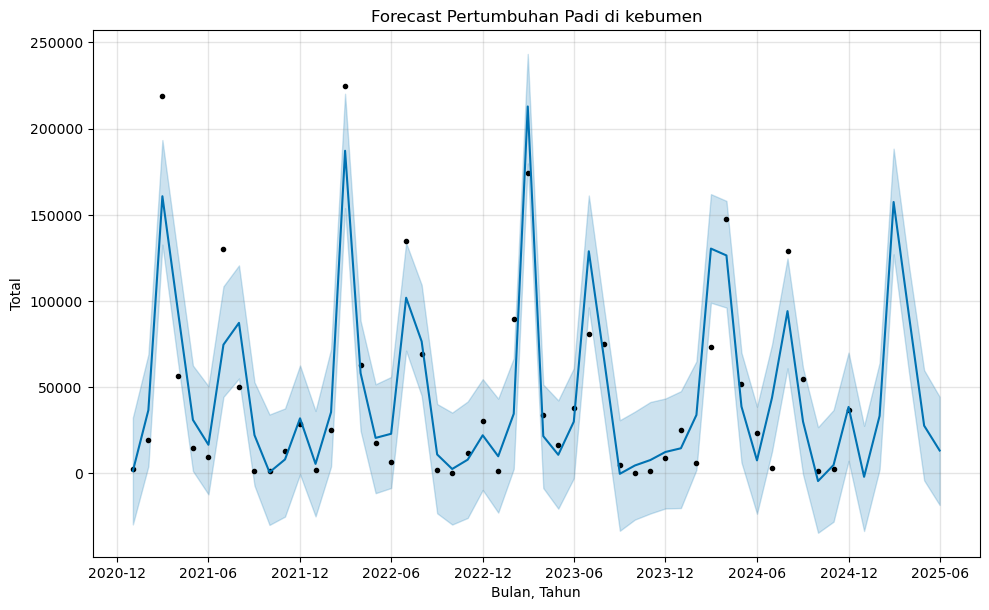

09:00:32 - cmdstanpy - INFO - Chain [1] start processing
09:00:33 - cmdstanpy - INFO - Chain [1] done processing


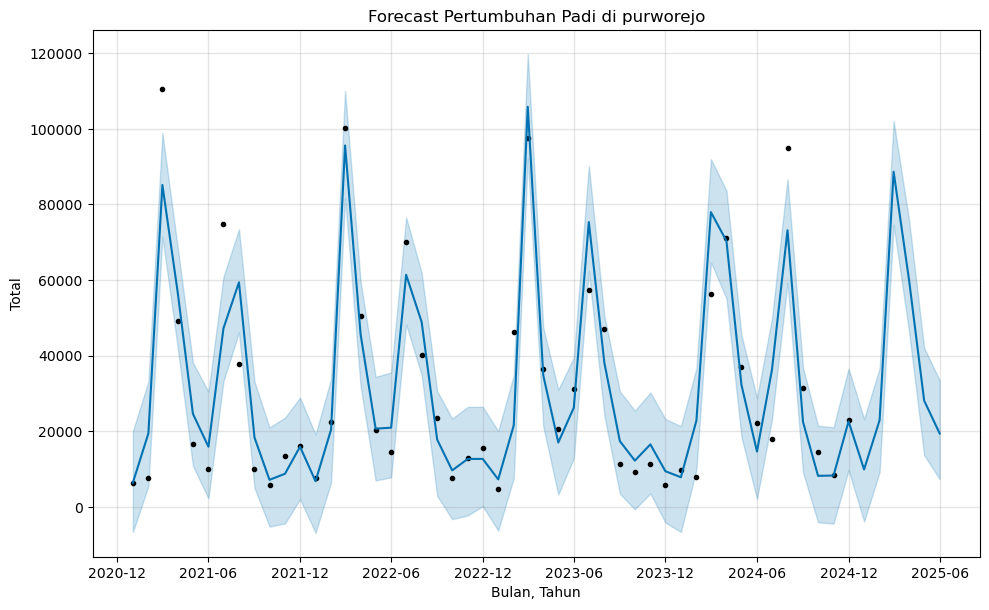

09:00:35 - cmdstanpy - INFO - Chain [1] start processing
09:00:35 - cmdstanpy - INFO - Chain [1] done processing


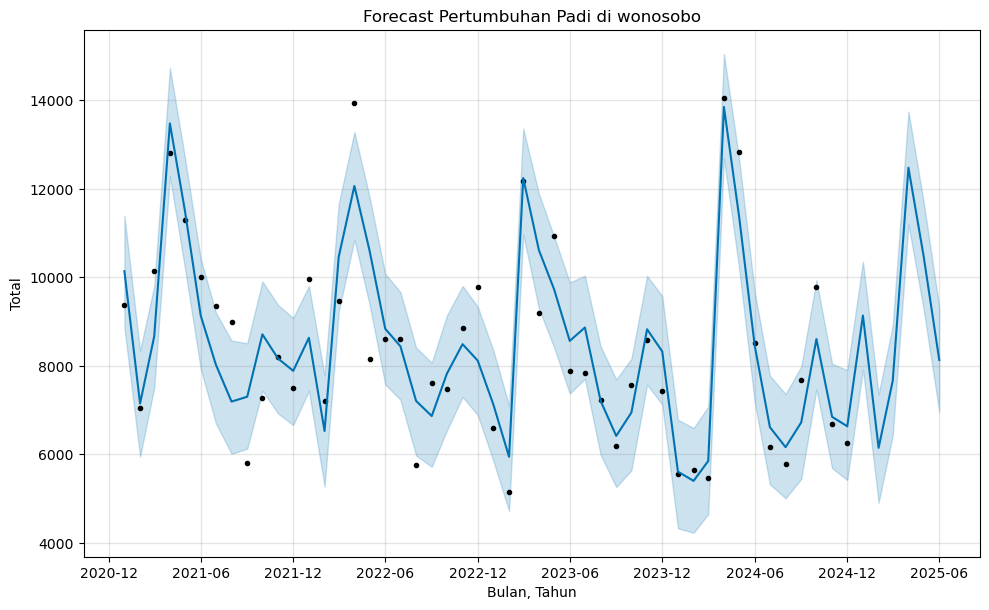

09:00:37 - cmdstanpy - INFO - Chain [1] start processing
09:00:37 - cmdstanpy - INFO - Chain [1] done processing


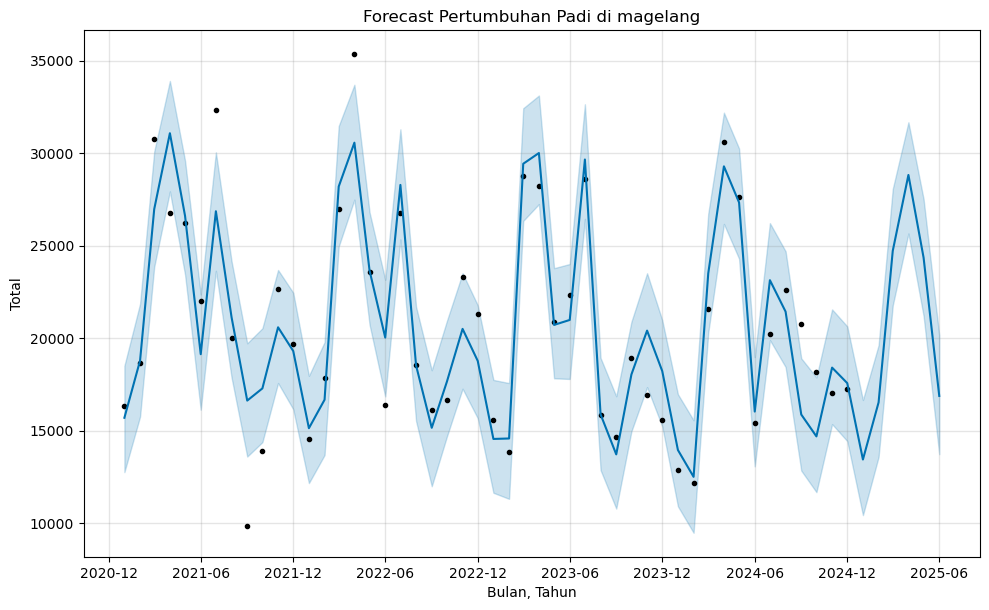

09:00:38 - cmdstanpy - INFO - Chain [1] start processing
09:00:39 - cmdstanpy - INFO - Chain [1] done processing


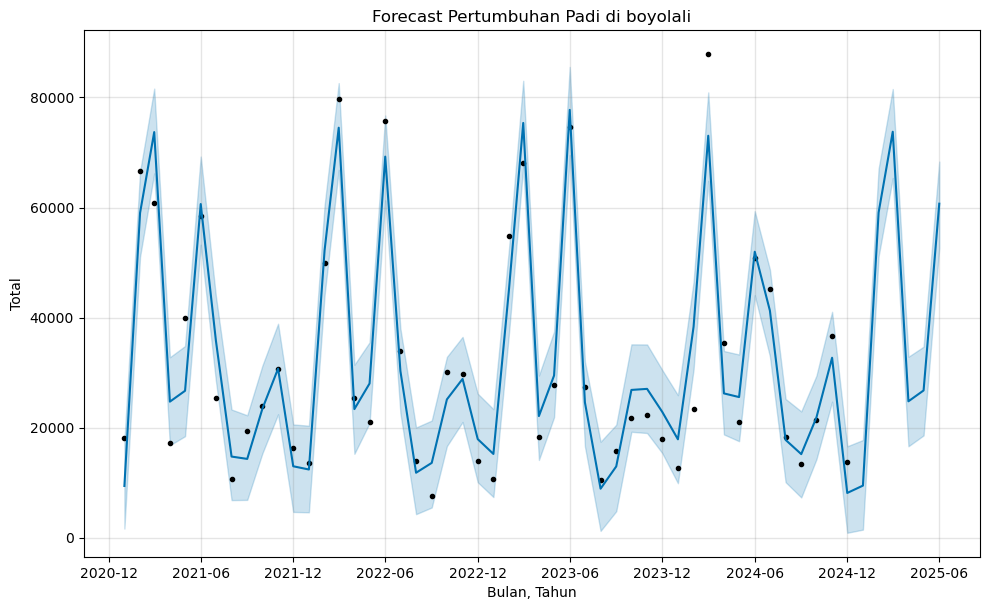

09:00:40 - cmdstanpy - INFO - Chain [1] start processing
09:00:41 - cmdstanpy - INFO - Chain [1] done processing


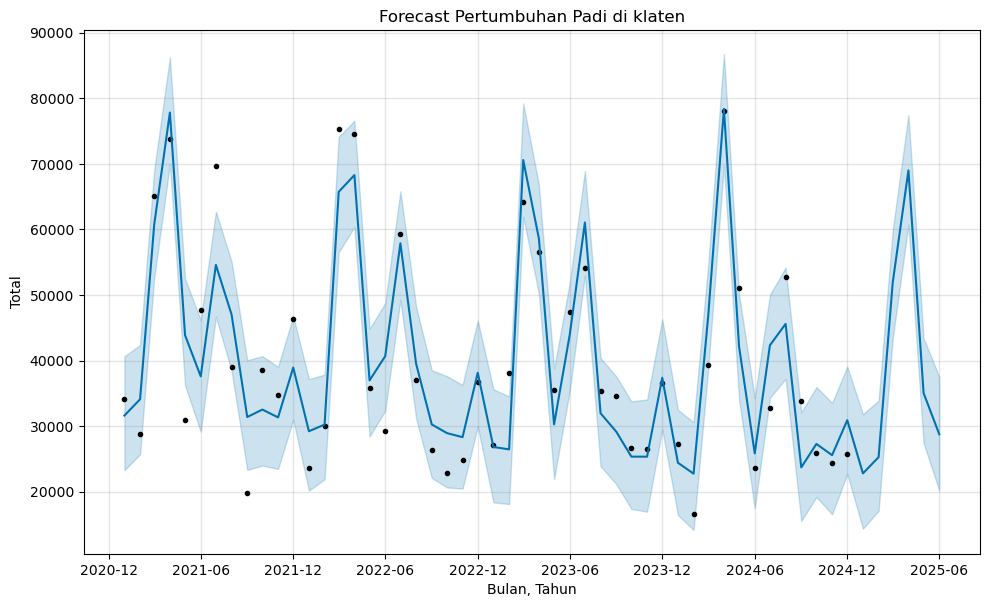

09:00:42 - cmdstanpy - INFO - Chain [1] start processing
09:00:43 - cmdstanpy - INFO - Chain [1] done processing


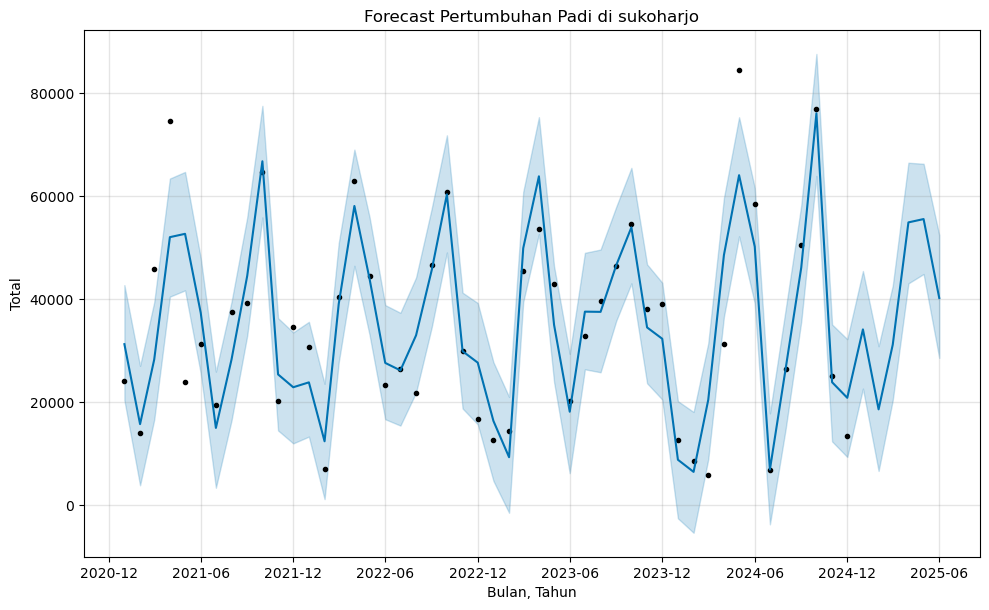

09:00:44 - cmdstanpy - INFO - Chain [1] start processing
09:00:45 - cmdstanpy - INFO - Chain [1] done processing


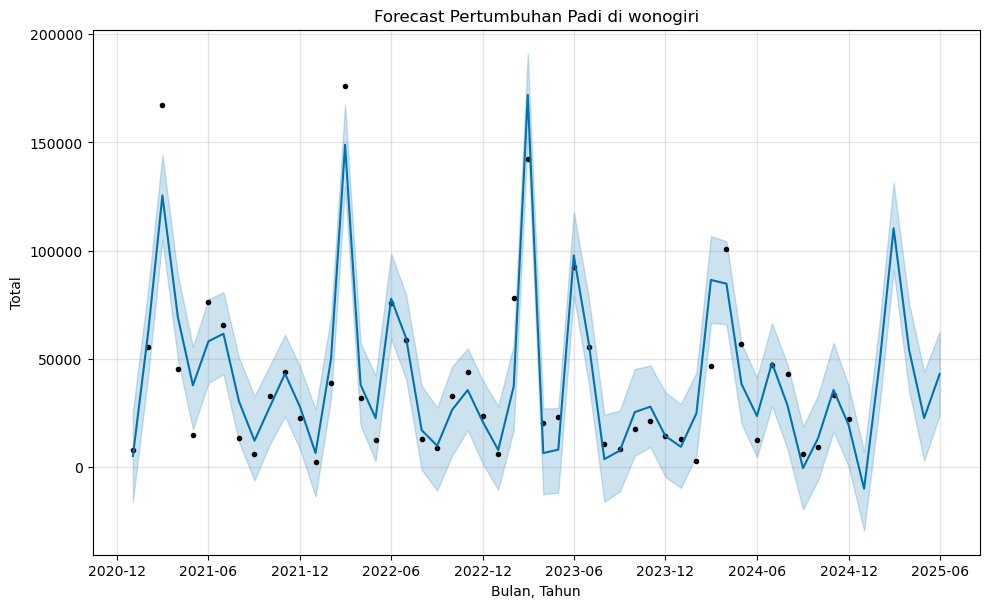

09:00:47 - cmdstanpy - INFO - Chain [1] start processing
09:00:48 - cmdstanpy - INFO - Chain [1] done processing


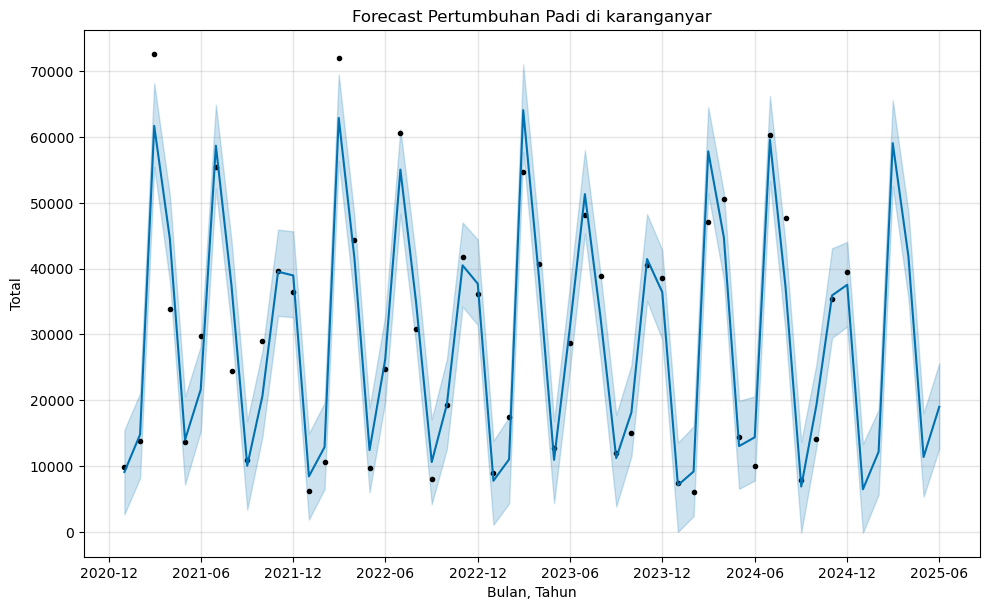

09:00:49 - cmdstanpy - INFO - Chain [1] start processing
09:00:50 - cmdstanpy - INFO - Chain [1] done processing


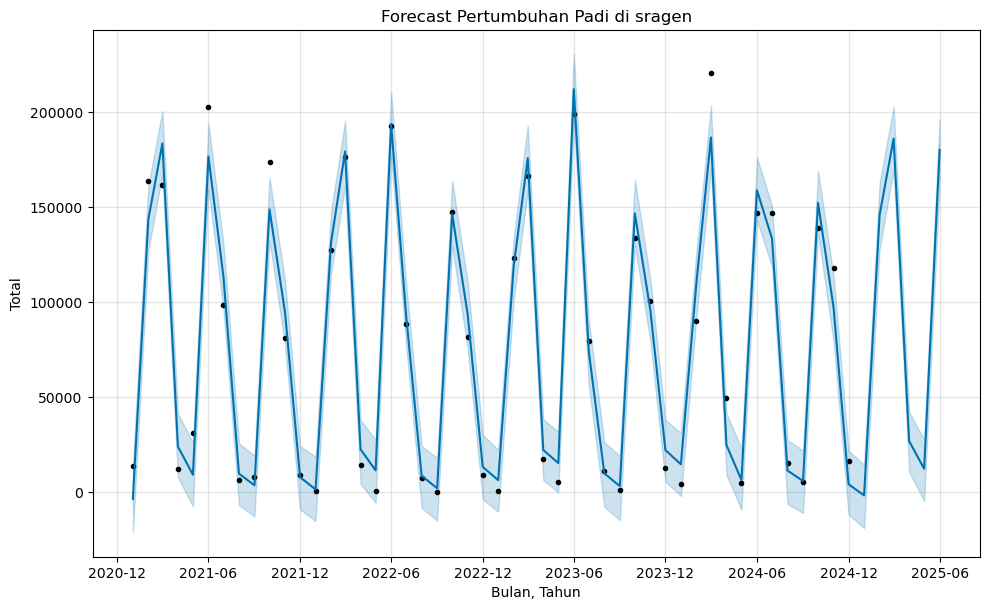

09:00:51 - cmdstanpy - INFO - Chain [1] start processing
09:00:52 - cmdstanpy - INFO - Chain [1] done processing


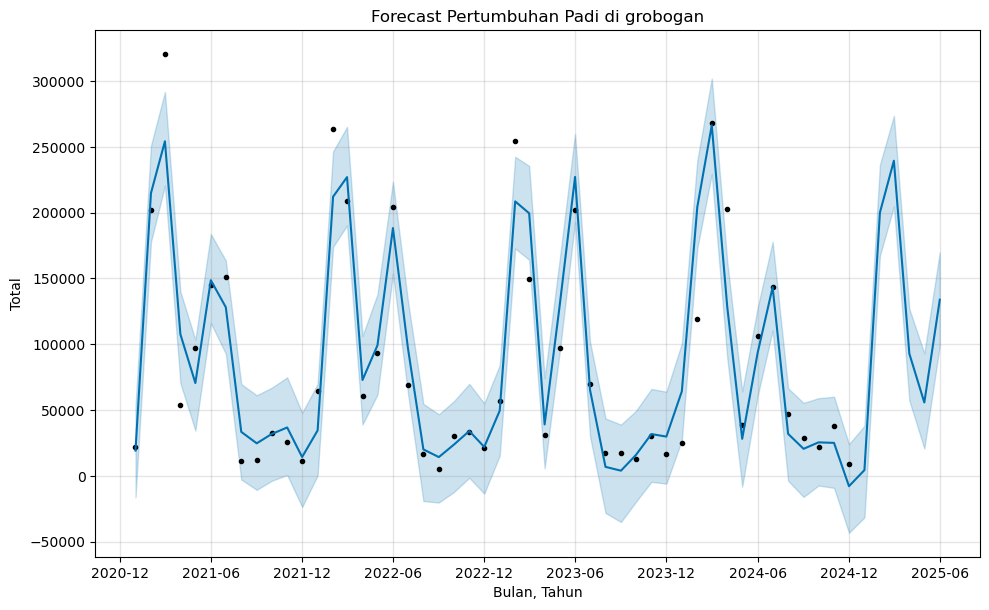

09:00:53 - cmdstanpy - INFO - Chain [1] start processing
09:00:53 - cmdstanpy - INFO - Chain [1] done processing


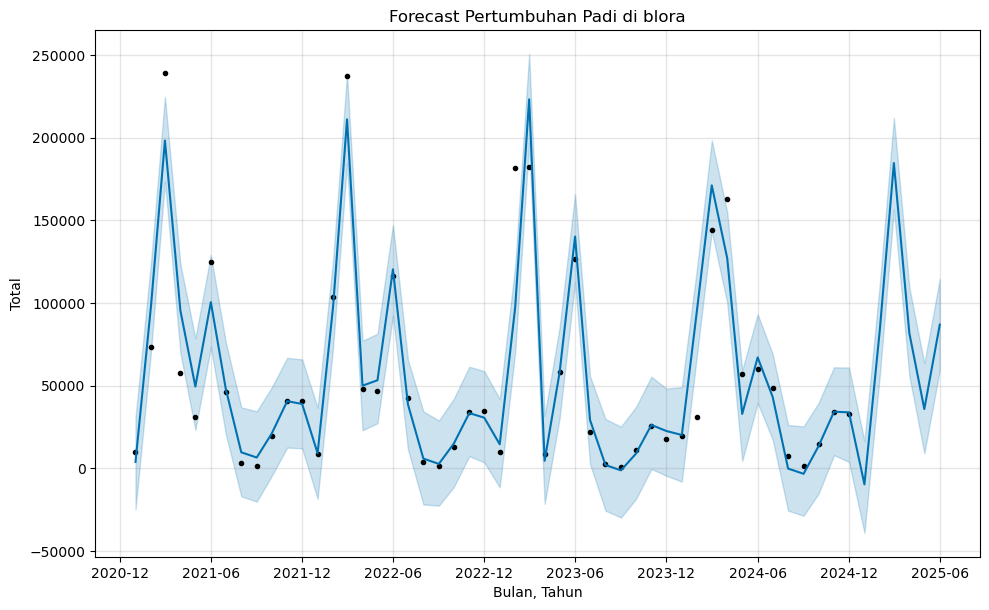

09:00:54 - cmdstanpy - INFO - Chain [1] start processing
09:00:55 - cmdstanpy - INFO - Chain [1] done processing


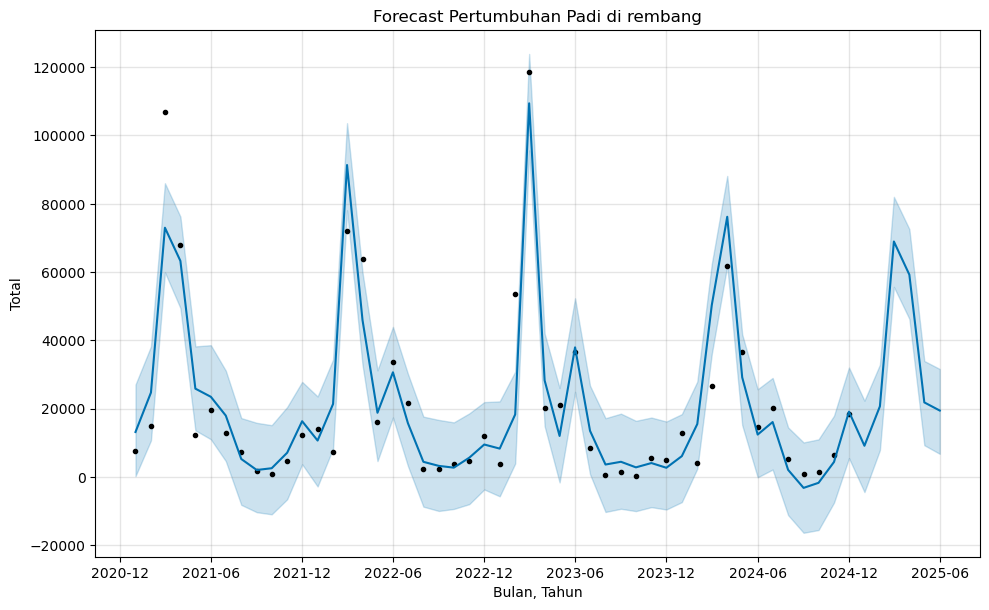

09:00:56 - cmdstanpy - INFO - Chain [1] start processing
09:00:56 - cmdstanpy - INFO - Chain [1] done processing


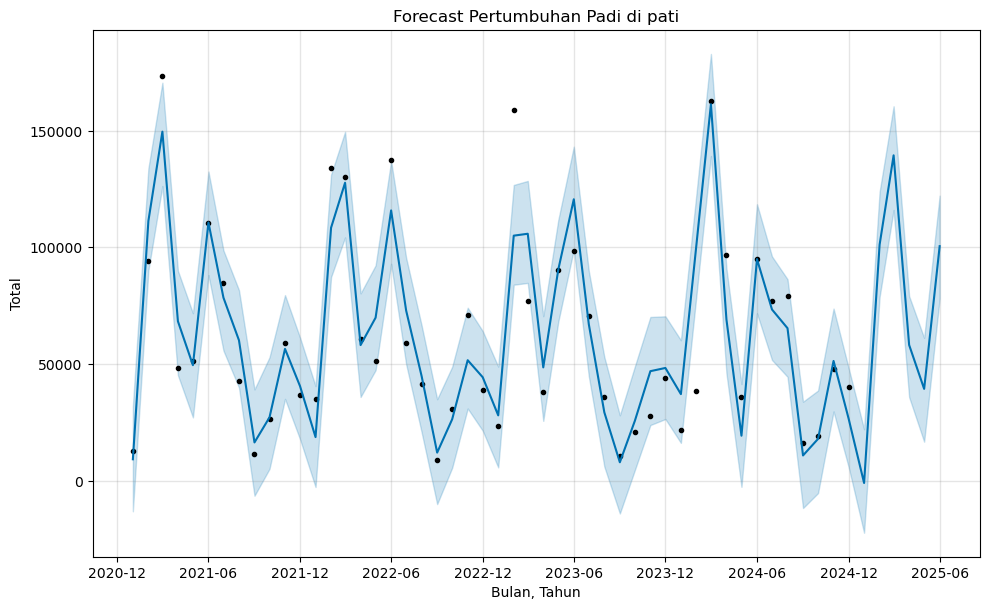

09:00:57 - cmdstanpy - INFO - Chain [1] start processing
09:00:58 - cmdstanpy - INFO - Chain [1] done processing


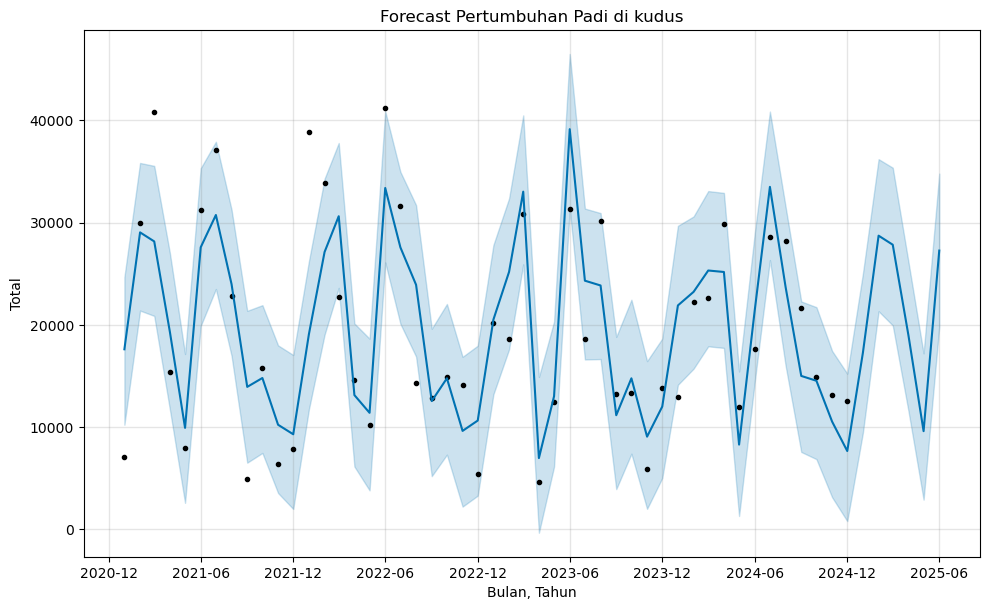

09:00:59 - cmdstanpy - INFO - Chain [1] start processing
09:01:00 - cmdstanpy - INFO - Chain [1] done processing


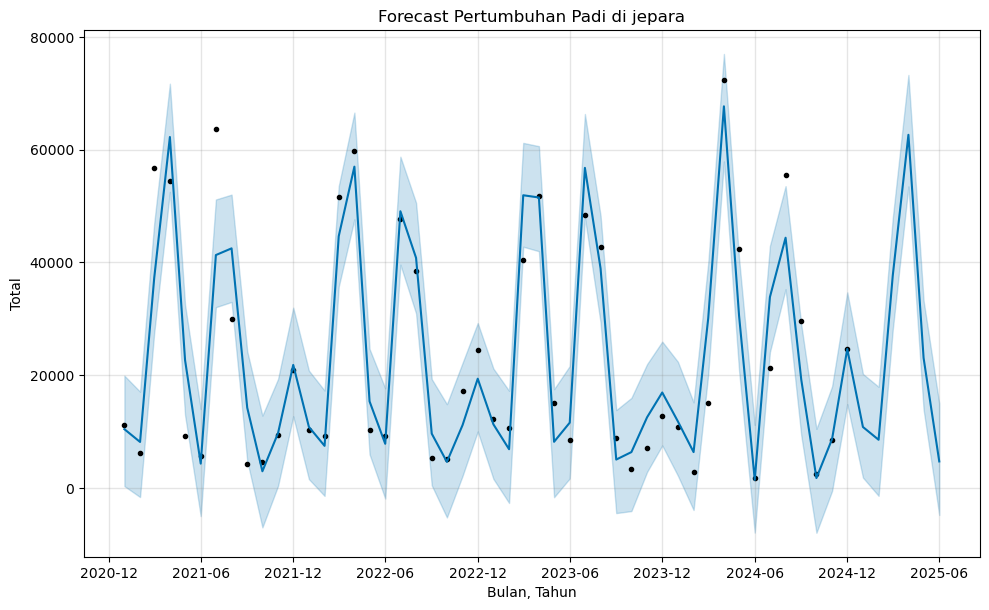

09:01:01 - cmdstanpy - INFO - Chain [1] start processing
09:01:01 - cmdstanpy - INFO - Chain [1] done processing


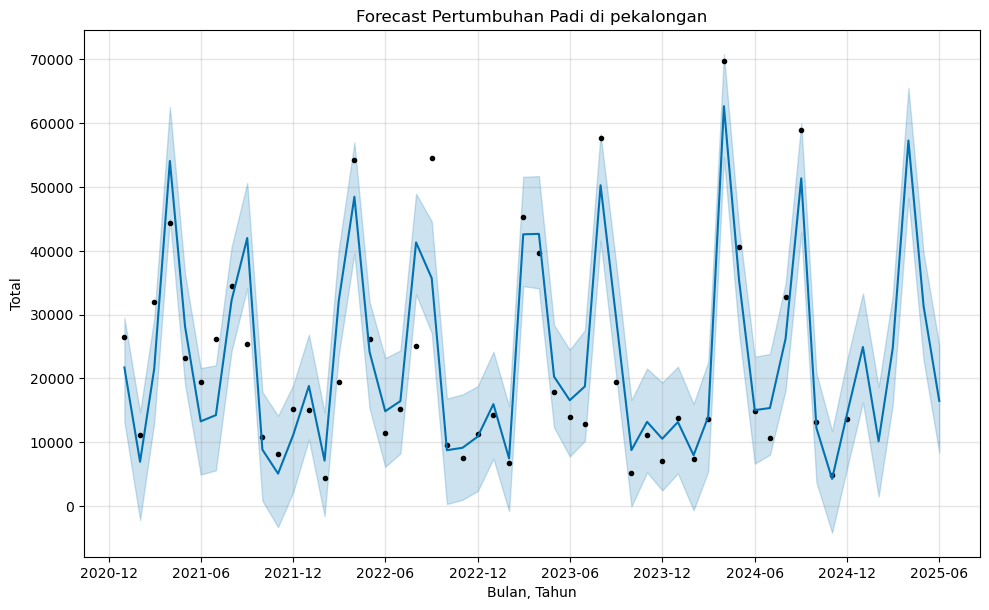

09:01:02 - cmdstanpy - INFO - Chain [1] start processing
09:01:02 - cmdstanpy - INFO - Chain [1] done processing


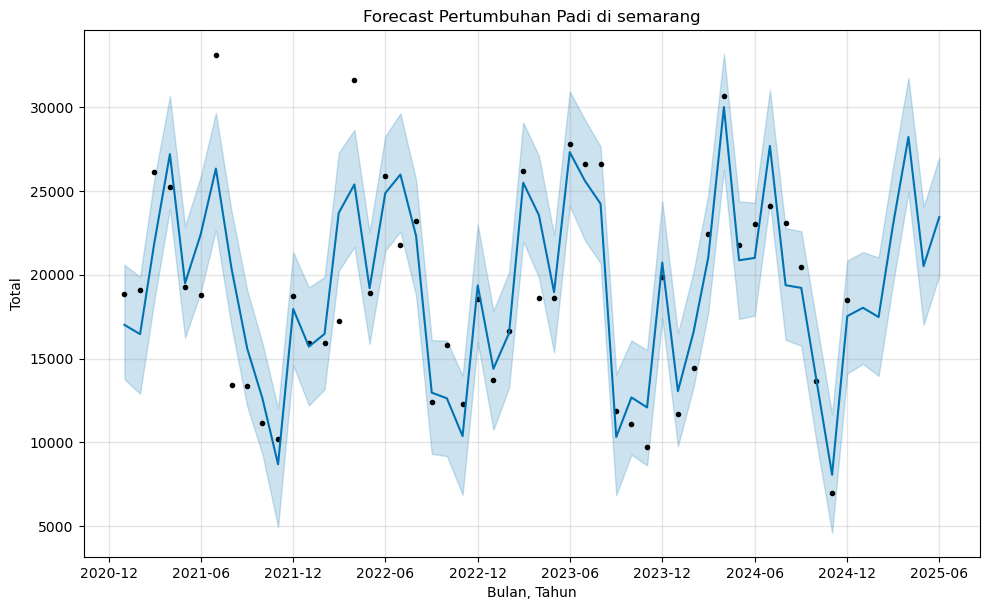

09:01:03 - cmdstanpy - INFO - Chain [1] start processing
09:01:03 - cmdstanpy - INFO - Chain [1] done processing


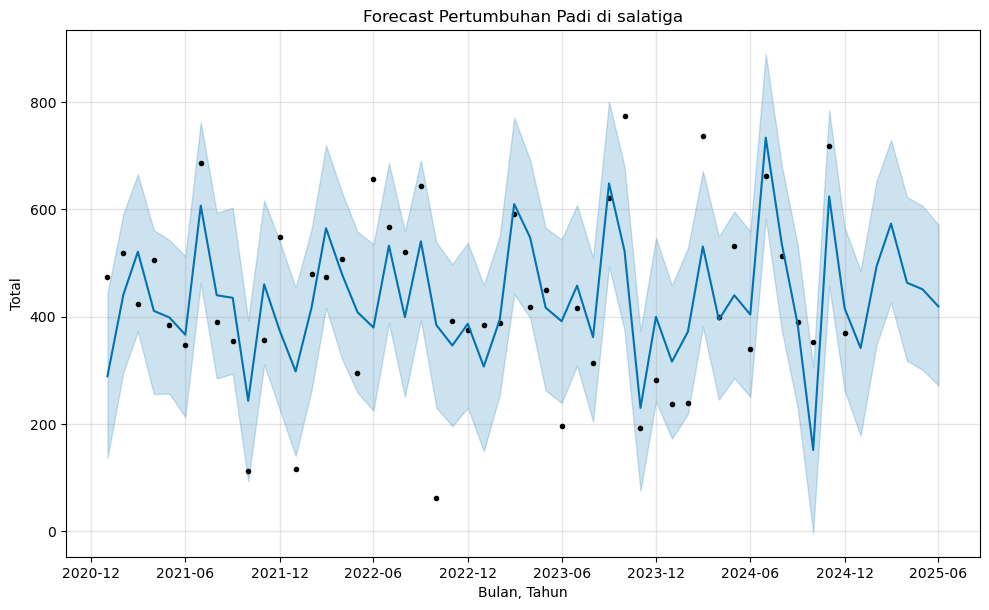

09:01:03 - cmdstanpy - INFO - Chain [1] start processing
09:01:04 - cmdstanpy - INFO - Chain [1] done processing


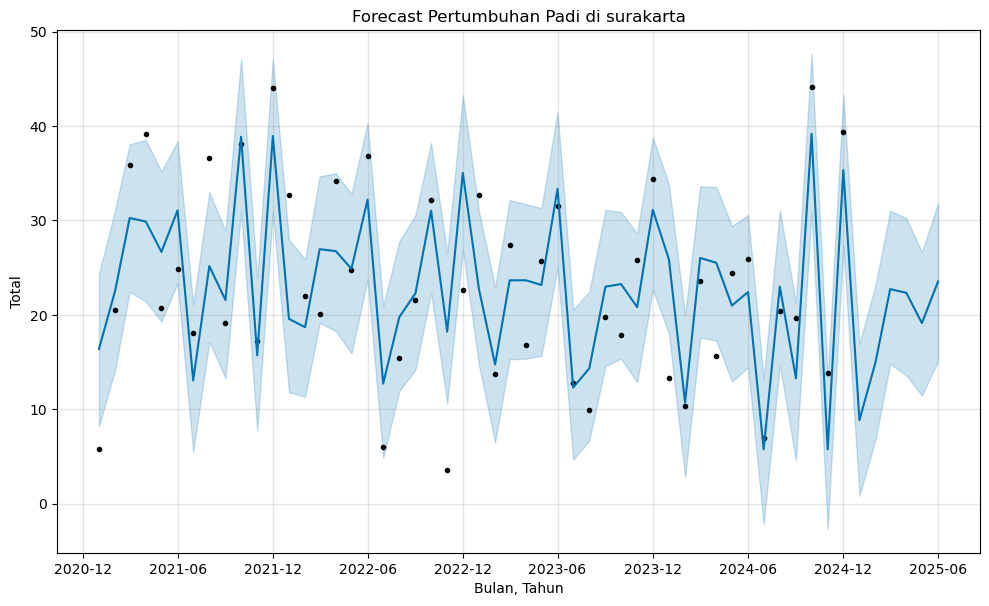

09:01:04 - cmdstanpy - INFO - Chain [1] start processing
09:01:04 - cmdstanpy - INFO - Chain [1] done processing


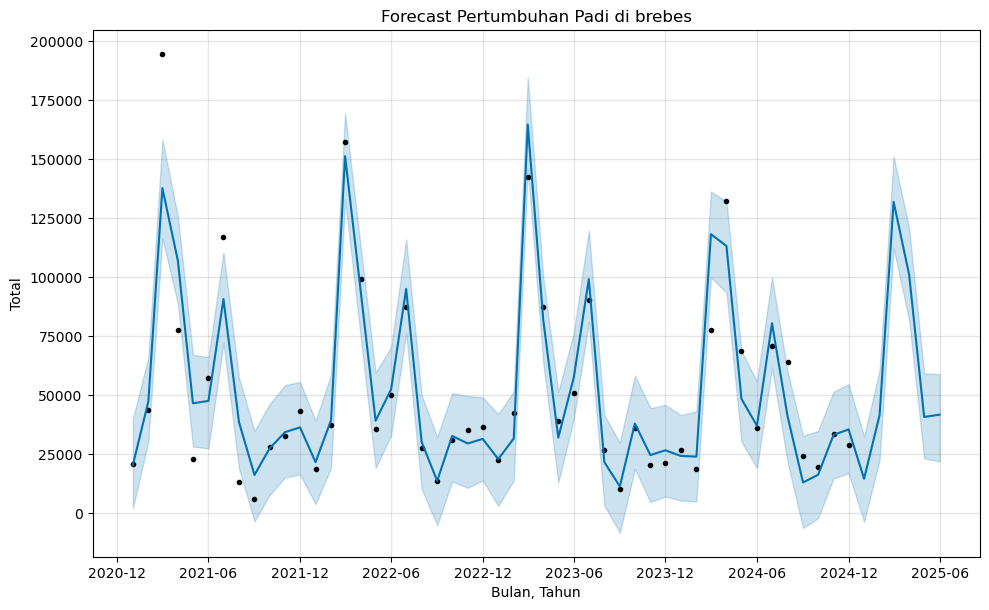

09:01:05 - cmdstanpy - INFO - Chain [1] start processing
09:01:05 - cmdstanpy - INFO - Chain [1] done processing


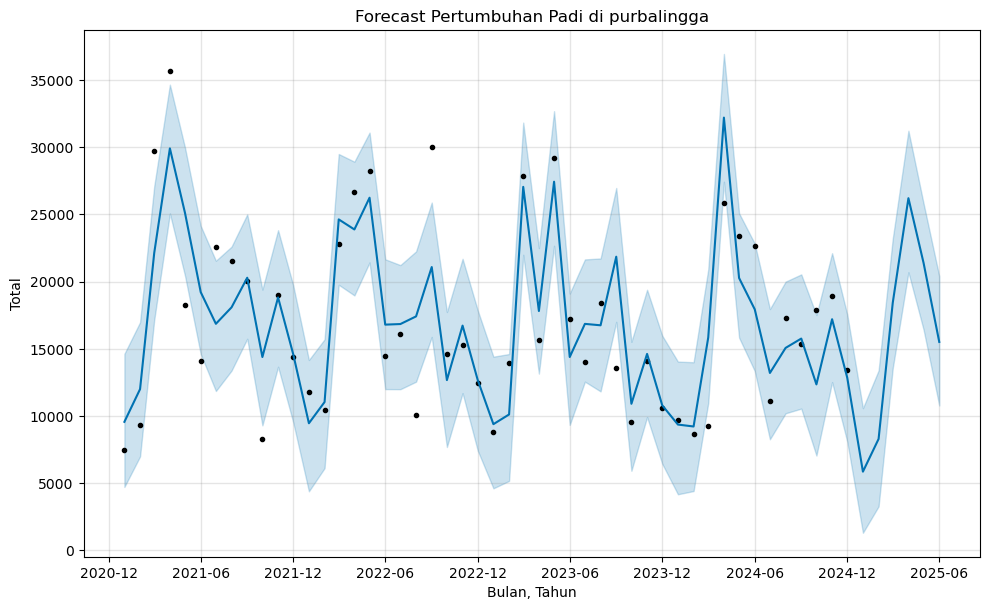

09:01:05 - cmdstanpy - INFO - Chain [1] start processing
09:01:06 - cmdstanpy - INFO - Chain [1] done processing


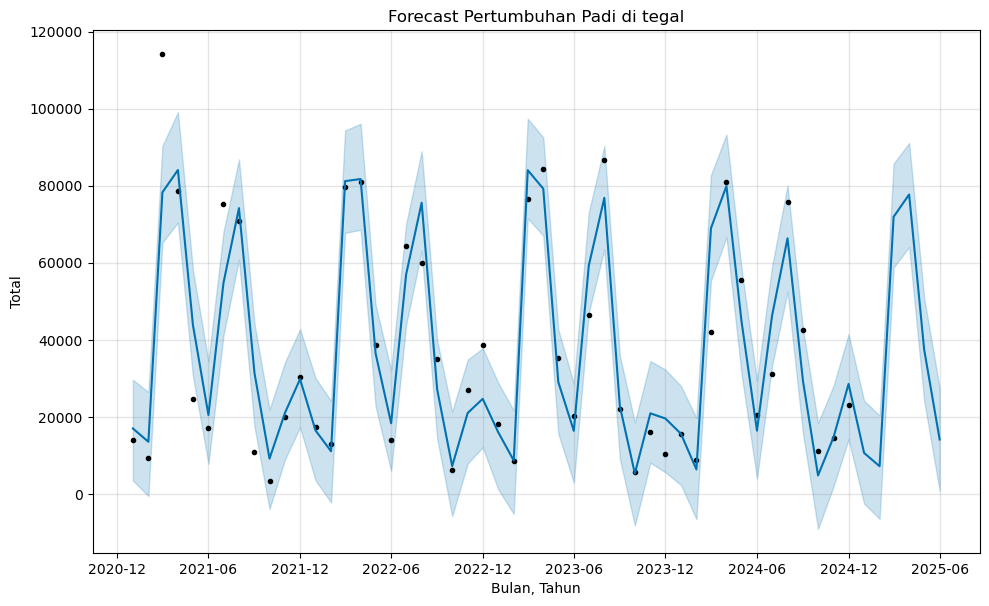

09:01:06 - cmdstanpy - INFO - Chain [1] start processing
09:01:06 - cmdstanpy - INFO - Chain [1] done processing


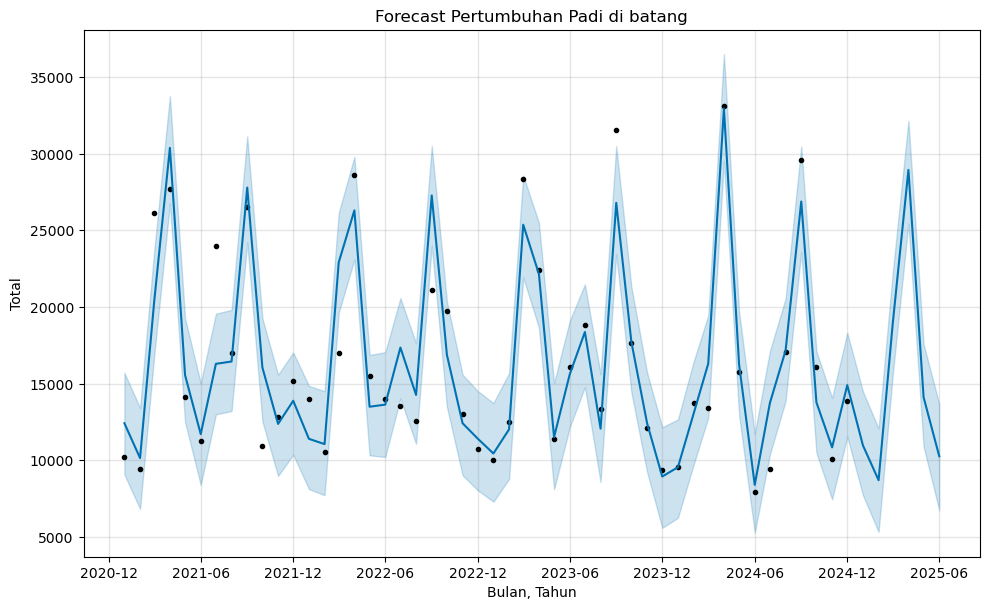

09:01:07 - cmdstanpy - INFO - Chain [1] start processing
09:01:07 - cmdstanpy - INFO - Chain [1] done processing


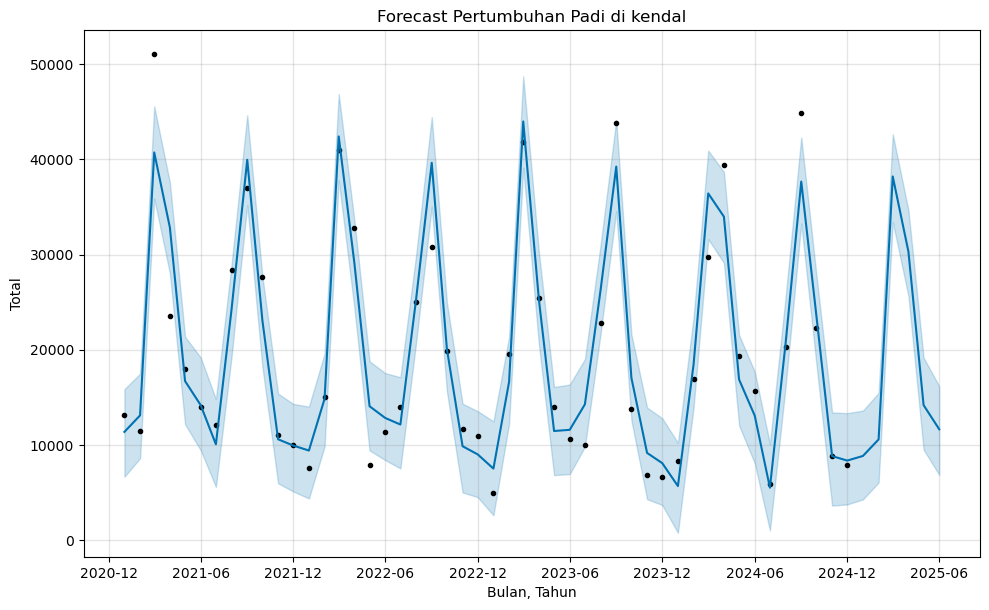

09:01:08 - cmdstanpy - INFO - Chain [1] start processing
09:01:08 - cmdstanpy - INFO - Chain [1] done processing


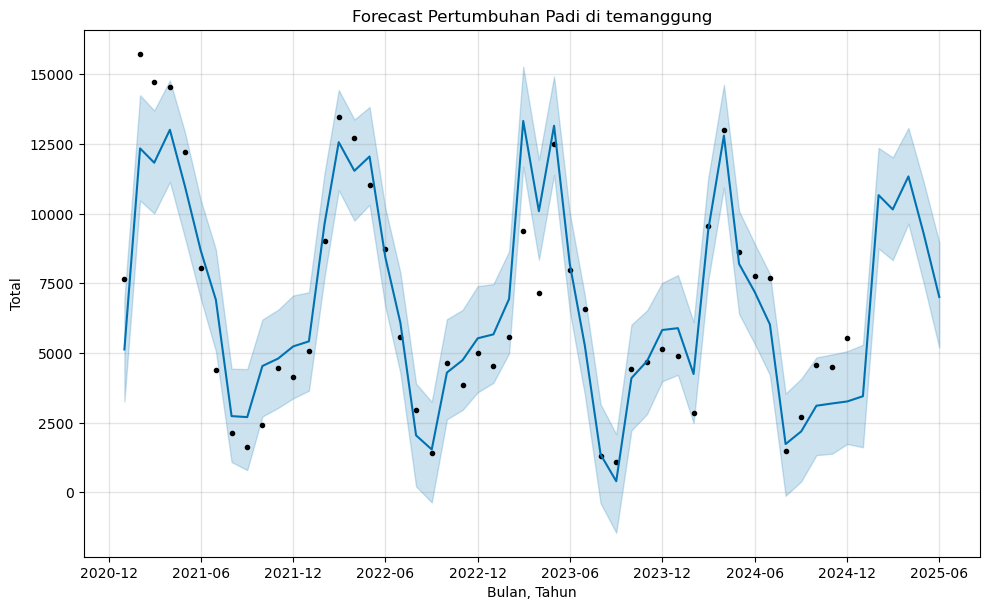

09:01:08 - cmdstanpy - INFO - Chain [1] start processing
09:01:09 - cmdstanpy - INFO - Chain [1] done processing


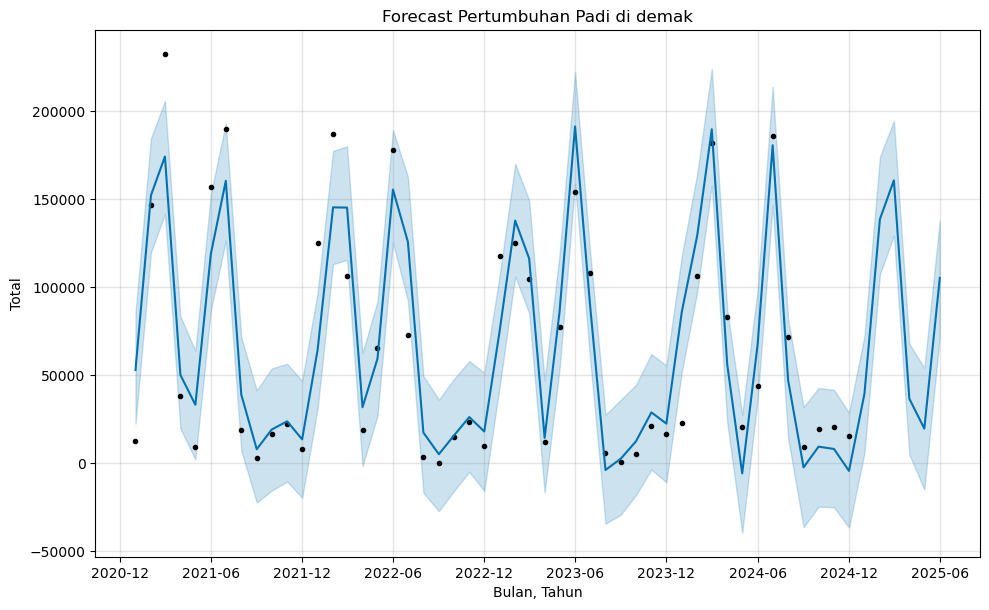

09:01:09 - cmdstanpy - INFO - Chain [1] start processing
09:01:10 - cmdstanpy - INFO - Chain [1] done processing


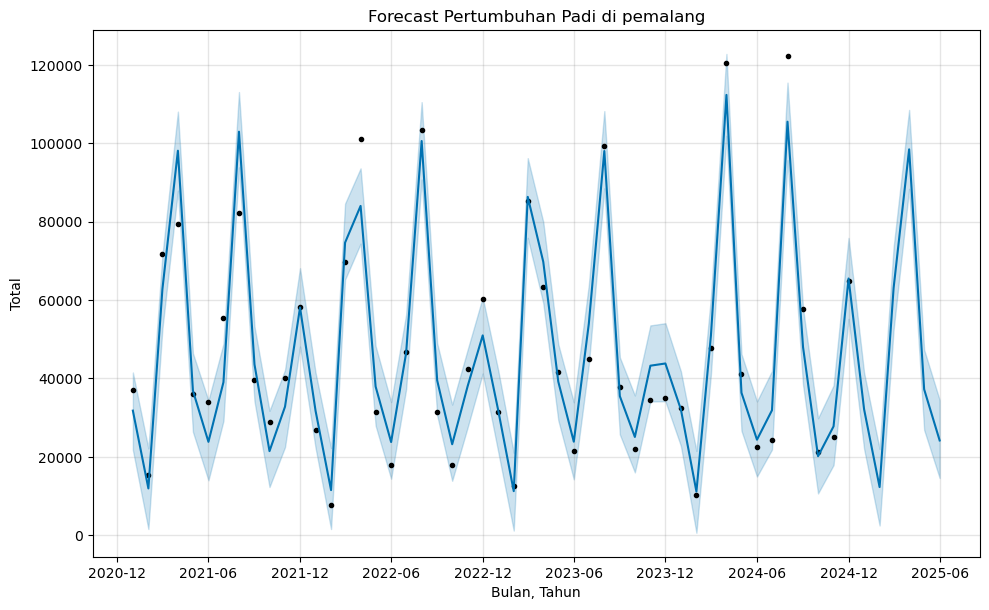

09:01:10 - cmdstanpy - INFO - Chain [1] start processing
09:01:10 - cmdstanpy - INFO - Chain [1] done processing


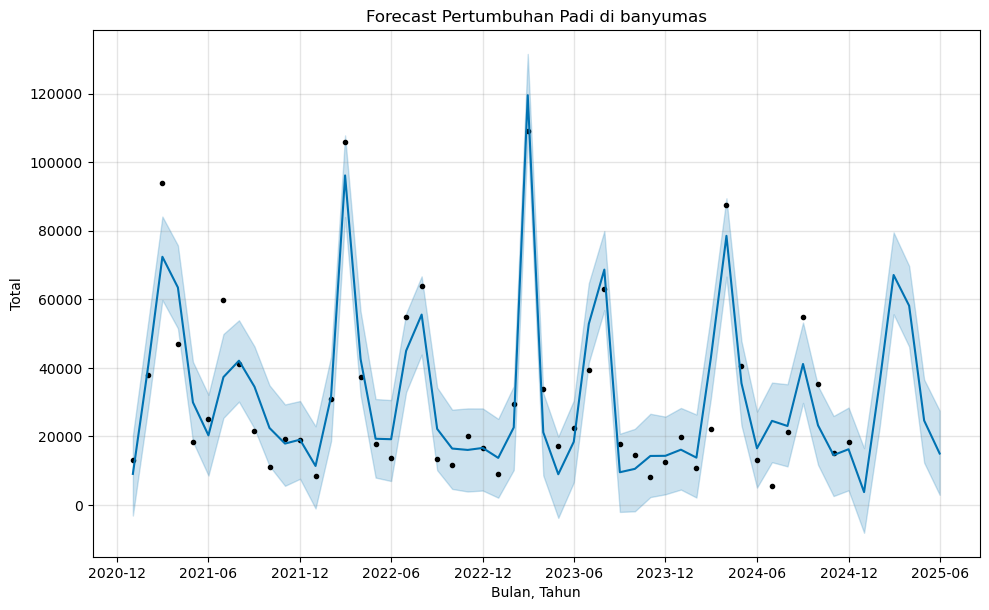

In [ ]:
for kota in data_filtered["daerah"].unique():
    df_kota = data_filtered[data_filtered["daerah"] == kota]
    
    df_grouped = df_kota.groupby("tanggal")["total"].sum().reset_index()
    
    df_prophet = df_grouped.rename(columns={"tanggal": "ds", "total": "y"})
    
    if df_prophet.shape[0] < 2:
        print(f"Data tidak cukup untuk forecast di {kota}")
        continue

    model = Prophet()
    model.fit(df_prophet)
    

    future = model.make_future_dataframe(periods=bulan_forecast_input, freq='MS')
    forecast = model.predict(future)
    
    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Forecast Pertumbuhan {tanaman_input.capitalize()} di {kota}")
    plt.xlabel("Bulan, Tahun")
    plt.ylabel("Total")
    plt.grid(True)
    plt.show()